# Processamento de Linguagem Natural (NLP)
## Pré-processamento, Representações Vetoriais e Similaridade de Textos
Neste notebook, você aprenderá a aplicar diversas técnicas de pré-processamento de texto, desde a implementação manual até o uso da biblioteca SpaCy. Também exploraremos diferentes formas de representar textos numericamente (BoW, TF-IDF) e como medir a similaridade entre documentos usando cosseno.

## 1. Lowercasing
Converter o texto para letras minúsculas é o primeiro passo para padronizar os dados, evitando que palavras como "Casa" e "casa" sejam tratadas como diferentes.

### Exercício 1 - Lowercasing Manual
Converta o texto abaixo para letras minúsculas usando Python puro.

In [1]:
text = "O Gato Subiu NO Telhado."
# converta para minúsculas
text = text.lower()
text

'o gato subiu no telhado.'

### Exercício 2 - Lowercasing com SpaCy
Repita a operação usando SpaCy e verifique os tokens.

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download pt_core_news_sm

In [ ]:
import spacy
nlp = spacy.load('pt_core_news_sm')

text = "O Gato Subiu NO Telhado."
doc = nlp(text)


In [7]:
doc

O Gato Subiu NO Telhado.

In [3]:
doc.text

'O Gato Subiu NO Telhado.'

In [6]:
# note que doc é um objeto, para utilizar a string, precisa utilizar doc.text
print(type(doc))
print(type(doc.text))

<class 'spacy.tokens.doc.Doc'>
<class 'str'>


In [8]:
doc.text.lower()

'o gato subiu no telhado.'

## 2. Remoção de Pontuação
A pontuação normalmente não carrega significado semântico relevante e pode ser removida.

### Exercício 3 - Remoção Manual de Pontuação
Remova manualmente a pontuação usando expressões regulares.

In [9]:
import re
text = "Olá, tudo bem? Espero que sim! Vamos começar."
# removendo pontuações

punctuations = [',', '!', '?', '.']

for punctuation in punctuations:
    text = text.replace(punctuation, '')

text

'Olá tudo bem Espero que sim Vamos começar'

### Exercício 4 - Remoção de Pontuação com SpaCy
Use SpaCy para ignorar tokens que são pontuação.

In [18]:
text = "Olá, tudo bem? Espero que sim! Vamos começar."
doc = nlp(text)
[token.text.lower() for token in doc if not token.is_punct]

['olá', 'tudo', 'bem', 'espero', 'que', 'sim', 'vamos', 'começar']

## 3. Tokenização
Tokenizar é dividir o texto em unidades menores, geralmente palavras.

### Exercício 5 - Tokenização Manual
Divida o texto em palavras usando `.split()`

In [10]:
text = "Aprendizado de máquina é incrível"
# tokenizando manualmente criando uma lista de tokens
text = text.split()
text

['Aprendizado', 'de', 'máquina', 'é', 'incrível']

### Exercício 6 - Tokenização com SpaCy
Tokenize o mesmo texto com SpaCy.

In [13]:
doc = nlp(text)
[token.text for token in doc]

['Aprendizado', 'de', 'máquina', 'é', 'incrível']

## 4. Remoção de Stopwords
Stopwords são palavras muito comuns que normalmente não carregam significado relevante.

### Remoção Manual de Stopwords
Use uma lista manual de stopwords para removê-las.

In [13]:
# removendo stopwords criando uma lista de palavras comuns que devem ser removidas
text = 'Eu gosto de estudar dados pra ficar inteligente!'

stopwords = [' e ', ' o ', ' a ', ' de ', ' pra ']

for stopword in stopwords:
    text = text.replace(stopword, ' ')

text

'Eu gosto estudar dados ficar inteligente!'

### Exercício 8 - Remoção de Stopwords com SpaCy
Use SpaCy para remover automaticamente as stopwords.

In [24]:
doc = nlp("Eu gosto de estudar dados")
[token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

['gosto', 'estudar', 'dados']

## 5. Lematização e Stemming

- A lematização reduz uma palavra à sua forma canônica. Noutras palavras, transforma a palavra em sua raiz ou forma base.

    - Exemplo 1: "correndo" se torna "correr".
    - Exemplo 2: "melhores" se torna "bom".
    - Exemplo 3: "maçãs" se torna "maçã".

- Stemming é uma técnica semelhante, mas menos precisa, que corta os sufixos das palavras. Por exemplo, "correndo" se torna "corr".

- Qual dos dois utilizar? A lematização é mais precisa, mas o stemming pode ser mais rápido. A escolha depende do seu caso de uso.

**Importante: o Spacy não faz Stemming**

In [16]:
text = "Os meninos estavam correndo felizes."
doc = nlp(text)
[token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

['menino', 'estar', 'correr', 'feliz']

In [25]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [14]:
import nltk
from nltk.stem import RSLPStemmer

# baixando o stemmer
nltk.download('rslp')
stemmer = RSLPStemmer()

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\TG\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [15]:
stems = [stemmer.stem(token.text.lower()) for token in doc if not token.is_stop and not token.is_punct]
stems

['gat', 'sub', 'telh']

## 6. Representações Vetoriais
Agora que temos textos pré-processados, precisamos representá-los numericamente para aplicar modelos.

### 6.1 Corpus:
Um corpus é uma coleção de documentos, usada como base para análise linguística e processamento de linguagem natural.

Os próximos passos envolvem a construção de um corpus.

Iremos criar um corpus, entender como o Bag of Words (BoW) funciona e como a representação TF-IDF pode ser aplicada.

### 6.2 Bag of Words (BoW)
Representa um texto como uma coleção de palavras, ignorando gramática e ordem, e focando apenas na frequência com que as palavras aparecem.

1. **Contagem de Palavras**: Crie um dicionário que conta a frequência de cada palavra em um texto.
2. **Representação BoW**: Construa uma matriz onde cada linha representa um documento e cada coluna representa uma palavra do vocabulário, preenchida com a contagem de palavras.

### Exercício 10 - Crie um Corpus com os seguintes documentos:

- `"gato gosta de peixe",`
- `"cachorro gosta de osso"`
- `"peixe e osso são alimentos"`

In [17]:
corpus = [
    "gato gosta de peixe",
    "cachorro gosta de osso",
    "peixe e osso são alimentos"
]

corpus

['gato gosta de peixe', 'cachorro gosta de osso', 'peixe e osso são alimentos']

### Exercício 11 - BoW from scratch

Construa uma representação BoW para o corpus criado no exercício 10. Utilize um dicionário para contar a frequência de cada palavra e crie uma matriz onde cada linha representa um documento e cada coluna representa uma palavra do vocabulário.

In [ ]:
# create a vocabulary
vocabulary = set(word for doc in corpus for word in doc.split())
vocabulary = sorted(vocabulary)

# create the BoW matrix
bow_matrix = []
for doc in corpus:
    word_counts = [doc.split().count(word) for word in vocabulary]
    bow_matrix.append(word_counts)

print("Vocabulary:", vocabulary)
print("BoW Matrix:")
for row in bow_matrix:
    print(row)

Vocabulary: ['alimentos', 'cachorro', 'de', 'e', 'gato', 'gosta', 'osso', 'peixe', 'são']
BoW Matrix:
[0, 0, 1, 0, 1, 1, 0, 1, 0]
[0, 1, 1, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 1, 0, 0, 1, 1, 1]


### Exercício 11 - BoW com CountVectorizer
Use `CountVectorizer` para gerar a matriz BoW.

In [ ]:
!pip install scikit-learn

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "gato gosta de peixe",
    "cachorro gosta de osso",
    "peixe e osso são alimentos"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['alimentos' 'cachorro' 'de' 'gato' 'gosta' 'osso' 'peixe' 'são']
[[0 0 1 1 1 0 1 0]
 [0 1 1 0 1 1 0 0]
 [1 0 0 0 0 1 1 1]]


### 6.2 TF-IDF (Term Frequency-Inverse Document Frequency)
Ajusta a frequência com base em quão rara uma palavra é em outros documentos.

- **TF**: Frequência de uma palavra em um documento.
- **IDF**: Inverso da frequência de documentos que contêm a palavra.
- **TF-IDF**: Produto de TF e IDF, representando a importância de uma palavra em um documento em relação ao corpus.

Pseudo-código para calcular TF-IDF:

```
para um documento d em documentos:
    para cada palavra p em d:
        tf = contagem de p em d / total de palavras em d
        idf = log(total de documentos / contagem de documentos que contêm p)
        tfidf[p] = tf * idf
```


### Exercício 12 - TF-IDF com TfidfVectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)
print(tfidf.get_feature_names_out())
print(X_tfidf.toarray())

['cachorro' 'de' 'está' 'gato' 'gosta' 'jardim' 'no' 'peixe' 'telhado']
[[0.         0.         0.46580855 0.46580855 0.         0.
  0.46580855 0.         0.59081908]
 [0.55528266 0.         0.43779123 0.         0.         0.55528266
  0.43779123 0.         0.        ]
 [0.         0.52547275 0.         0.41428875 0.52547275 0.
  0.         0.52547275 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


## 7. Similaridade
A similaridade cosseno mede o quão parecidos dois vetores são com base no ângulo entre eles.

$$
\text{similaridade\_cosseno}(\vec{A}, \vec{B}) = \frac{\vec{A} \cdot \vec{B}}{\|\vec{A}\| \cdot \|\vec{B}\|} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \cdot \sqrt{\sum_{i=1}^{n} B_i^2}}
$$

**Onde:**

- O produto escalar dos vetores A e B mede o quanto os vetores "apontam na mesma direção".

- ∥A∥ e ∥B∥: são os módulos (ou magnitudes) dos vetores A e B. Isso normaliza os vetores, ou seja, ignora o tamanho e foca na direção

Imagine dois vetores apontando em direções diferentes.

- Quanto mais próximos eles estiverem, **menor o ângulo entre eles**, o que resulta em uma **maior similaridade cosseno**.

- Se eles apontam para a **mesma direção**, a similaridade cosseno será **1 (máxima similaridade)**.

- Se forem **ortogonais (formam 90 graus)**, a similaridade será **0 (sem similaridade)**.

- Se forem **opostos**, o valor será **-1 (totalmente opostos)**.


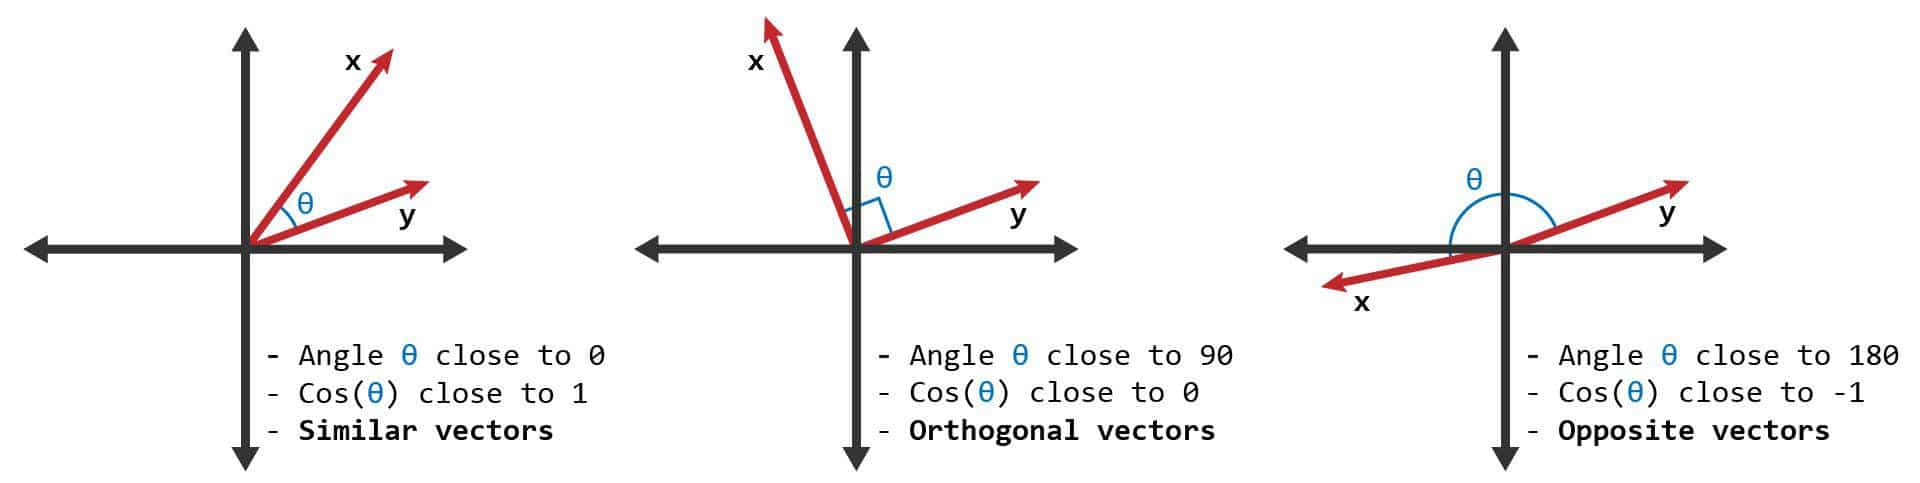

### Exercício 12 - Crie uma função para calcular a similaridade cosseno entre dois vetores.

**Dica**: use a biblioteca `numpy` para facilitar os cálculos.

`np.dot` e `np.linalg.norm`


In [42]:
import numpy as np

vetor_A = np.array([1, 2, 3])
vetor_B = np.array([4, 5, 6])

# calcule o produto escalar

# calcule a norma do vetor_A

# calcule a norma do vetor_B

# similaridade_cosseno = produto_escalar / norma_A * norma_B

In [21]:
# produto escalar dos dois vetores
1*4 + 2*5 + 3*6

32

In [ ]:
soma = 0
for item_a, item_b in zip(vetor_A, vetor_B):
    soma += item_a * item_b

soma

32

In [20]:
# com numpy
np.dot(vetor_A, vetor_B)

32

In [25]:
# norma do vetor A
(1**2 + 2**2 + 3**2) ** 0.5

3.7416573867739413

In [22]:
soma = 0
for item in vetor_A:
    soma += item**2

soma ** 0.5 # raiz quadrada 1/2

3.7416573867739413

In [23]:
# com numpy
np.linalg.norm(vetor_A)

3.7416573867739413

In [37]:
vetor_B, vetor_A

(array([4, 5, 6]), array([1, 2, 3]))

In [43]:
np.dot(vetor_A, vetor_B) / (np.linalg.norm(vetor_A) * np.linalg.norm(vetor_B))

0.9746318461970762

### Exercício 14 - Teste sua função agora com os vetores abaixo:

```python
vetor_A = np.array([1, 2, 3])
vetor_B = np.array([1, 2, 6])
```

**Notou alguma diferença em relação ao exercício anterior?**

In [44]:
vetor_A = np.array([1, 2, 3])
vetor_B = np.array([1, 2, 6])

def similaridade_cosseno(vetor_A, vetor_B):
    return np.dot(vetor_A, vetor_B) / (np.linalg.norm(vetor_A) * np.linalg.norm(vetor_B))

similaridade_cosseno(vetor_A, vetor_B)

0.9600014517991345

### Exercício 15 - Agora aplique a função de similaridade cosseno entre os vetores gerados pelo `CountVectorizer` e `TfidfVectorizer`.

Vocabulário (CountVectorizer): ['alimentos' 'cachorro' 'de' 'gato' 'gosta' 'osso' 'peixe' 'são']
Matriz de contagem:
[[0 0 1 1 1 0 1 0]
 [0 1 1 0 1 1 0 0]
 [1 0 0 0 0 1 1 1]]

Similaridade Cosseno (CountVectorizer):
[[1.   0.5  0.25]
 [0.5  1.   0.25]
 [0.25 0.25 1.  ]]


<Axes: >

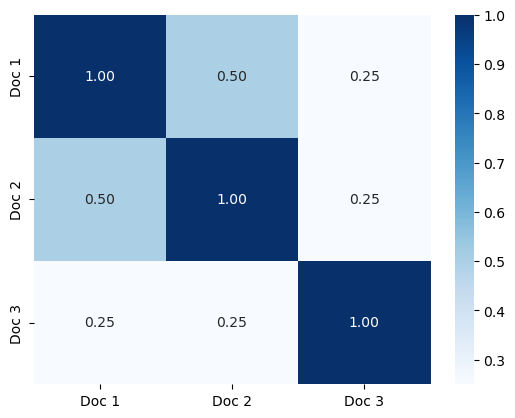

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import numpy as np

# Corpus
corpus = [
    "gato gosta de peixe",
    "cachorro gosta de osso",
    "peixe e osso são alimentos"
]

# --- CountVectorizer ---
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(corpus)

print("Vocabulário (CountVectorizer):", vectorizer.get_feature_names_out())
print("Matriz de contagem:")
print(X_count.toarray())

# Similaridade cosseno entre os documentos com CountVectorizer
similaridade_count = cosine_similarity(X_count)
print("\nSimilaridade Cosseno (CountVectorizer):")
print(np.round(similaridade_count, 2))

labels = ["Doc 1", "Doc 2", "Doc 3"]
sns.heatmap(similaridade_count, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)


Vocabulário (TfidfVectorizer): ['alimentos' 'cachorro' 'de' 'gato' 'gosta' 'osso' 'peixe' 'são']
Matriz TF-IDF:
[[0.   0.   0.46 0.6  0.46 0.   0.46 0.  ]
 [0.   0.6  0.46 0.   0.46 0.46 0.   0.  ]
 [0.56 0.   0.   0.   0.   0.43 0.43 0.56]]

Similaridade Cosseno (TfidfVectorizer):
[[1.   0.42 0.2 ]
 [0.42 1.   0.2 ]
 [0.2  0.2  1.  ]]


<Axes: >

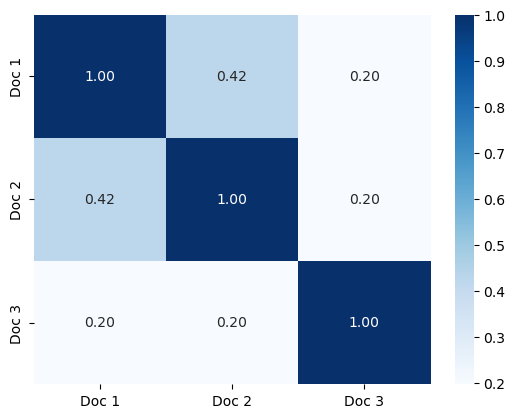

In [2]:
# --- TfidfVectorizer ---
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)

print("\nVocabulário (TfidfVectorizer):", tfidf.get_feature_names_out())
print("Matriz TF-IDF:")
print(np.round(X_tfidf.toarray(), 2))

# Similaridade cosseno entre os documentos com TfidfVectorizer
similaridade_tfidf = cosine_similarity(X_tfidf)
print("\nSimilaridade Cosseno (TfidfVectorizer):")
print(np.round(similaridade_tfidf, 2))
sns.heatmap(similaridade_tfidf, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)